In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
import networkx as nx

$Y_i = a+b*T_i+e_i$

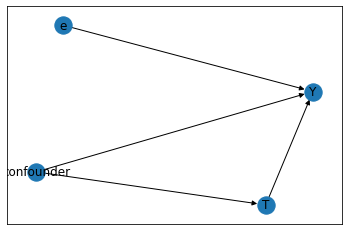

In [2]:
graph = nx.DiGraph()
# confounder influences both the treatment and the outcome. Like IQ impact on education makes it hard to measure effect of education on wage
graph.add_edges_from([("T", "Y"), ("e", "Y"), ("confounder", "Y"), ("confounder", "T")])
plt.tight_layout()
nx.draw_networkx(graph, arrows=True)
plt.savefig("g1.png", format="PNG")

Without Contol

The RSME is 664.7929315987674 . The bias is -664.7929315987674 . The treatment effect is 7.8479293159876695


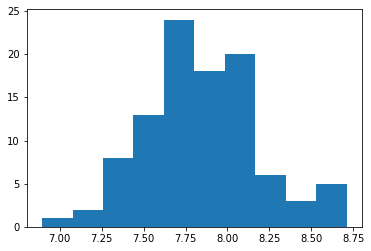

In [20]:
a = .5
b = 1.2
c = 2
n = 100
slopes = []
sum_of_bias=0
for mc in range(100):
    X = np.random.normal(0,10,n)
    # treatment is correlated with confounder X. Here it is correlated by .3 so not random assignment
    T = .3 + .3 * X
    e = np.random.normal(0,10,n)
    # not controlling for X in this regression
    Y = a+b*T + c*X + e
    model = sm.OLS(Y,sm.add_constant(T))
    residuals = model.fit()
    slopes = slopes + [residuals.params[1]]
    bias  = b - residuals.params[1]
    sum_of_bias= sum_of_bias+bias
np.mean(slopes)
plt.hist(slopes)
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slopes) / len(slopes)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

The RSME is 6663.262299399331 . The bias is -6663.262299399331 . The treatment effect is 7.8632622993993415


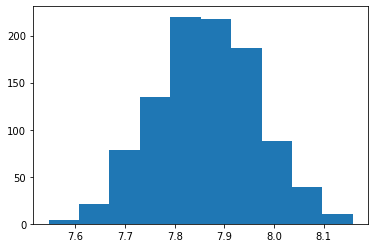

In [21]:
a = .5
b = 1.2
c = 2
n = 1000
slopes = []
sum_of_bias=0
for mc in range(1000):
    X = np.random.normal(0,10,n)
    T = .3 + .3 * X
    e = np.random.normal(0,10,n)
    Y = a+b*T + c*X +e
    model = sm.OLS(Y,sm.add_constant(T))
    residuals = model.fit()
    slopes = slopes + [residuals.params[1]]
    bias  = b - residuals.params[1]
    sum_of_bias= sum_of_bias+bias
np.mean(slopes)
plt.hist(slopes)
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slopes) / len(slopes)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

With Control

/Users/polly/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The RSME is 36.274226772749536 . The bias is 36.274226772749536 . The treatment effect is 0.8372577322725047


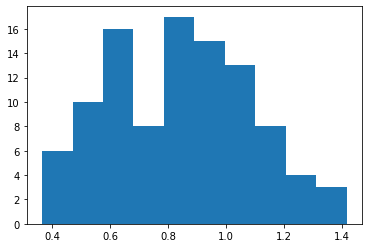

In [27]:
a = .5
b = 1.2
c = 2
n = 100
slopes = []
sum_of_bias=0
for mc in range(100):
    X = np.random.normal(0,10,n)
    # again, treatment is impacted by X
    T = .3 + .3 * X
    e = np.random.normal(0,10,n)
    # here, we control for X. So, in measuring edu impact on wage, we control for IQ as well
    Y = a+b*T + c*X + e
    # data now consists of T and X to allow for control
    data = pd.DataFrame({'T':T, 'X':X})
    model = sm.OLS(Y,sm.add_constant(data))
    residuals = model.fit()
    slopes = slopes + [residuals.params[1]]
    bias  = b - residuals.params[1]
    sum_of_bias= sum_of_bias+bias
np.mean(slopes)
plt.hist(slopes)
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slopes) / len(slopes)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

The RSME is 6666.216929709472 . The bias is -6666.216929709472 . The treatment effect is 7.866216929709471


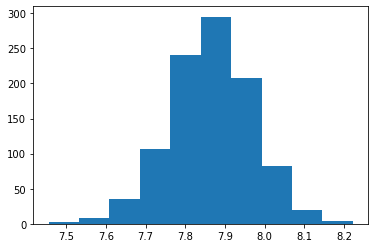

In [19]:
a = .5
b = 1.2
c = 2
n = 1000
slopes = []
sum_of_bias=0
for mc in range(1000):
    X = np.random.normal(0,10,n)
    # again, treatment is impacted by X
    T = .3 + .3 * X
    e = np.random.normal(0,10,n)
    # here, we control for X. So, in measuring edu impact on wage, we control for IQ as well
    Y = a+b*T + c*X + e
    data = pd.DataFrame({'T':T, 'X':X})
    model = sm.OLS(Y,sm.add_constant(data))
    residuals = model.fit()
    slopes = slopes + [residuals.params[1]]
    bias  = b - residuals.params[1]
    sum_of_bias= sum_of_bias+bias
np.mean(slopes)
plt.hist(slopes)
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slopes) / len(slopes)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

REAL LIFE EXAMPLE

Confounding bias is when there is a confounding variable that impacts both the treatment and outcome variable. For example, economists often run into this problem when trying to determine the effect of education on wage. That is because there is the confounding influence of intelligence, which is hard to measure. Being more intelligent probably makes your more likely to get educated and get a higher wage. So, if you can't control for intelligence, you will have too large of an estimate for the impact of education